### ESMA 4016
### Clustering I
### Edgar Acuna 

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt
%matplotlib inline

###  I.  Calculo de distancias para  Diabetes

In [19]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [20]:
y=data['class']
X=data.iloc[:,0:8]
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X= scaler.transform(X)
dist2=pairwise_distances(X)
dist2.shape

(768L, 768L)

In [21]:
#distancia Euclideana
dist2=pairwise_distances(X)
dist2

array([[ 0.        ,  3.22924385,  3.25837474, ...,  2.72463806,
         2.97509995,  3.4017847 ],
       [ 3.22924385,  0.        ,  4.26273005, ...,  1.99408342,
         2.6650958 ,  0.91047974],
       [ 3.25837474,  4.26273005,  0.        , ...,  3.09591822,
         3.29725594,  4.32363443],
       ..., 
       [ 2.72463806,  1.99408342,  3.09591822, ...,  0.        ,
         2.69881799,  2.01762486],
       [ 2.97509995,  2.6650958 ,  3.29725594, ...,  2.69881799,
         0.        ,  3.04917966],
       [ 3.4017847 ,  0.91047974,  4.32363443, ...,  2.01762486,
         3.04917966,  0.        ]])

In [22]:
#Distancia Manhattan tambien llamada CityBlock
dist_manh=pairwise_distances(X,metric="manhattan")
dist_manh

array([[ 0.        ,  7.48176212,  7.27315027, ...,  6.66185328,
         6.52829826,  7.206271  ],
       [ 7.48176212,  0.        ,  8.54177411, ...,  4.42959032,
         5.22414488,  1.85434371],
       [ 7.27315027,  8.54177411,  0.        , ...,  7.48796614,
         7.18435902,  9.8953635 ],
       ..., 
       [ 6.66185328,  4.42959032,  7.48796614, ...,  0.        ,
         6.63552353,  4.98197366],
       [ 6.52829826,  5.22414488,  7.18435902, ...,  6.63552353,
         0.        ,  5.67721907],
       [ 7.206271  ,  1.85434371,  9.8953635 , ...,  4.98197366,
         5.67721907,  0.        ]])

In [23]:
#Distancia correlation pero entre las columnas de Diabtes
distcor=pairwise_distances(X.T,metric="correlation")
distcor

array([[ 0.        ,  0.87054133,  0.85871802,  1.08167177,  1.07353461,
         0.98231691,  1.03352267,  0.45565877],
       [ 0.87054133,  0.        ,  0.84741041,  0.94267211,  0.66864289,
         0.77892893,  0.8626627 ,  0.73648568],
       [ 0.85871802,  0.84741041,  0.        ,  0.79262946,  0.91106662,
         0.71819471,  0.95873505,  0.76047205],
       [ 1.08167177,  0.94267211,  0.79262946,  0.        ,  0.56321743,
         0.6074268 ,  0.81607243,  1.11397026],
       [ 1.07353461,  0.66864289,  0.91106662,  0.56321743,  0.        ,
         0.80214094,  0.81492907,  1.04216295],
       [ 0.98231691,  0.77892893,  0.71819471,  0.6074268 ,  0.80214094,
         0.        ,  0.85935305,  0.96375813],
       [ 1.03352267,  0.8626627 ,  0.95873505,  0.81607243,  0.81492907,
         0.85935305,  0.        ,  0.96643869],
       [ 0.45565877,  0.73648568,  0.76047205,  1.11397026,  1.04216295,
         0.96375813,  0.96643869,  0.        ]])

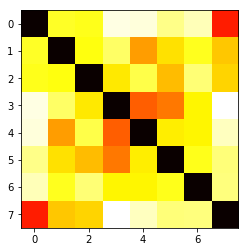

In [24]:
#Visualizando las distancias de correlation
plt.imshow(distcor,cmap='hot')

Mientras mas oscura sea la celda menor es la distancia correlacion mientras mas clara mayor es la distancia correlacion cuyo valor a lo mas [uede alcanzar el valor de 2]

### 2. Haciendo clustering con k-Means para Diabetes,k=2

In [25]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
clustlabels=kmeans.labels_

In [26]:
kmeans.cluster_centers_

array([[ 0.95874949,  0.43363662,  0.40679905, -0.14296386, -0.02520141,
         0.11848227,  0.03159628,  1.04966979],
       [-0.52576585, -0.23780073, -0.22308335,  0.07839954,  0.01382013,
        -0.06497415, -0.01732699, -0.57562537]])

In [27]:
#Hallando el tamano de los dos clusters formados
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Tamano de los dos clusters formados")
print(np.asarray((unique_elements, counts_elements)))

Tamano de los dos clusters formados
[[  0   1]
 [272 496]]


In [28]:
#Comparando los clusters con las clases verdaderas
pd.value_counts(y.values, sort=False)

1    500
2    268
dtype: int64

In [29]:
kmeans.cluster_centers_

array([[ 0.95874949,  0.43363662,  0.40679905, -0.14296386, -0.02520141,
         0.11848227,  0.03159628,  1.04966979],
       [-0.52576585, -0.23780073, -0.22308335,  0.07839954,  0.01382013,
        -0.06497415, -0.01732699, -0.57562537]])

### 3. Haciendo clustering con k-Means para Diabetes,k=3

In [30]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clustlabels=kmeans.labels_
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Tamano de los tres clusters formados")
print(np.asarray((unique_elements, counts_elements)))

Tamano de los tres clusters formados
[[  0   1   2]
 [329 223 216]]


### 4. Haciendo  clustering con PAM para Diabetes k=2

In [31]:
from Pycluster import *
import numpy
X=numpy.matrix(X)
clusterid,b,c=Pycluster.kmedoids(dist2)

NameError: name 'Pycluster' is not defined

In [ ]:
unique_elements, counts_elements = np.unique(clusterid, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

In [ ]:
#Comparando los clusters con las clases verdaderas
pd.value_counts(y.values, sort=False)

### 5. Aplicando k-Means a Landsat, k=5

In [ ]:
#Cargando el conjunto de datos Landsat
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X= scaler.transform(X)
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
clustlabels=kmeans.labels_
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Tamano de los seis clusters formados")
print(np.asarray((unique_elements, counts_elements)))

In [ ]:
pd.value_counts(y.values, sort=False)

### 6.  Kmeans aplicado a Shuttle, k=6

In [ ]:
url = "https://academic.uprm.edu/eacuna/shuttle.trn"
data = pd.read_table(url, header=None,delim_whitespace=True)

In [ ]:
y=data.iloc[:,9]
X=data.iloc[:,0:9]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X= scaler.transform(X)
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
clustlabels=kmeans.labels_
unique_elements, counts_elements = np.unique(clustlabels, return_counts=True)
print("Tamano de los siete clusters formados")
print(np.asarray((unique_elements, counts_elements)))

In [ ]:
pd.value_counts(y.values, sort=False)